# Scripts to manipulate the Waveform Database - wfdb package

## References:

https://github.com/MIT-LCP/wfdb-python

http://wfdb.readthedocs.io/

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

## Reading Records and Annotations

In [2]:
# Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.

# The same files are hosted on Physiobank https://physionet.org/physiobank/database/
# in the challenge/2015/training/ database subdirectory. Full url = https://physionet.org/physiobank/database/challenge/2015/training/

record = wfdb.rdrecord('a103l', pb_dir='challenge/2015/training/')

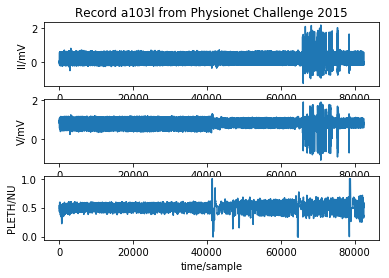

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [3]:
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)

In [6]:
# Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# (the same files hosted on Physiobank)
# which returns a numpy array and a dictionary. Show the data.
 
signals, fields = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pb_dir='ptbdb/patient001/')
display(signals)
display(fields)

array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ...,
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'fs': 1000,
 'sig_len': 14900,
 'n_sig': 4,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV', 'mV', 'mV'],
 'sig_name': ['vz', 'i', 'avf', 'v5'],
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac outp

In [7]:
# Read a WFDB header file only (without the signals) | (the same files hosted on Physiobank)

record2 = wfdb.rdheader('drive02', pb_dir='drivedb')
display(record.__dict__)

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

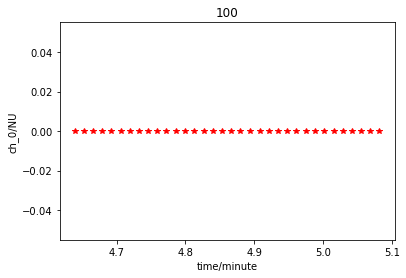

In [9]:
# Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples | (the same files hosted on Physiobank)

annotation = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pb_dir='mitdb')
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

### MIMIC matched waveform database

 These waveforms have been matched to clinical data in the MIMIC Clinical database. The input records are multi-segment (made up of multiple individual WFDB records) and relatively long.


In [16]:
# Read the multi-segment record and plot waveforms from the MIMIC matched waveform database. 

# Can also read the same files hosted on PhysioBank (takes long to stream the many large files)

#edit - I am still working on resolving the error

record = wfdb.rdsamp('s25047-2704-05-04-10-44', pb_dir = 'mimic2wdb/matched/s25047')
wfdb.plot_wfdb(record=record, title='Record s25047-2704-05-04-10-44') 
display(record.__dict__)

AttributeError: 'tuple' object has no attribute 'p_signal'

In [ ]:
# Read the multi-segment record and plot waveforms from the MIMIC matched waveform database.
# Notice that some channels have no valid values to plot
# Can also read the same files hosted on PhysioBank

record = wfdb.rdrecord('s00001-2896-10-10-00-31', sampfrom=3000000, sampto=4000000,
                        pb_dir = 'mimic2wdb/matched/s00001')

wfdb.plot_wfdb(record, title='Record s00001/s00001-2896-10-10-00-31') 
display(record.__dict__)

## Downloading Content from Physiobank

- The downloads are made via http
- We can streaming WFDB files stored in Physiobank without downloading them to local disk as well


In [17]:
# List of Physiobank Databases

dbs = wfdb.get_dbs()
display(dbs)

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Chall

In [ ]:
# Download all the WFDB records and annotations from a small Physiobank Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('ahadb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

In [ ]:
# Download specified files from a Physiobank database

# The files to download
file_list = ['STAFF-Studies-bibliography-2016.pdf', 'data/001a.hea', 'data/001a.dat', 'data/001b.hea', 'data/001b.dat']

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download the listed files
wfdb.dl_files('staffiii', dl_dir, file_list)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))
display(os.listdir(os.path.join(dl_dir, 'data')))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)